In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [149]:
import pandas as pd

# Load the Excel file
xls = pd.ExcelFile('heart_disease.xlsx')
# Turn the second sheet into a DataFrame
df = pd.read_excel(xls, 'Heart_disease')

In [150]:
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang  oldpeak        slope               thal  num  
0       150  False      2.3  downsloping       fixed defect    0  
1       132  False      0.0         flat       fixed defect    0  
2       148  False      0.4         flat       fixed defect    0  
3       190  False      0.0         flat       fixed defect    0  
4       126   True      1.5         flat       fixed defect    0  
..      ...    ...      ...          ...                ...  ...  
903     120  False      1.5    upsloping  reversable defect    4  
904     120   True      3.0         flat  reversable defect    4  
905     123   True      2.5  downsloping             normal    4  
906     105   TURE      NaN  downsloping       fixed defect    4  
907     182  FALSE      NaN         flat  reversable defect    4  

[908 rows x 13 columns]

In [151]:
df.shape #there are 908 rows + 1 header in the original sheet

(908, 13)

#EDA

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


##Convert dtype of exang to boolean

In [153]:
df['exang'].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [154]:
df['exang'] = df['exang'].str.replace('FALSE', 'False')
df['exang'] = df['exang'].str.replace('TURE', 'True')

In [155]:
df['exang'].unique()

array([nan, 'False', 'True'], dtype=object)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     55 non-null     object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [157]:
df['exang'] = df['exang'].map({'False': False, 'True': True})
df['exang'] = df['exang'].astype(bool)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


##Check for missing values

In [159]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [160]:
min_value = df['oldpeak'].min()
max_value = df['oldpeak'].max()

print(f"Range of oldpeak: {min_value} to {max_value}")

Range of oldpeak: -2.6 to 6.2


In [161]:
mean_oldpeak = df['oldpeak'].mean()

In [162]:
df['oldpeak'] = df['oldpeak'].fillna(mean_oldpeak)

In [163]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

##Visualization

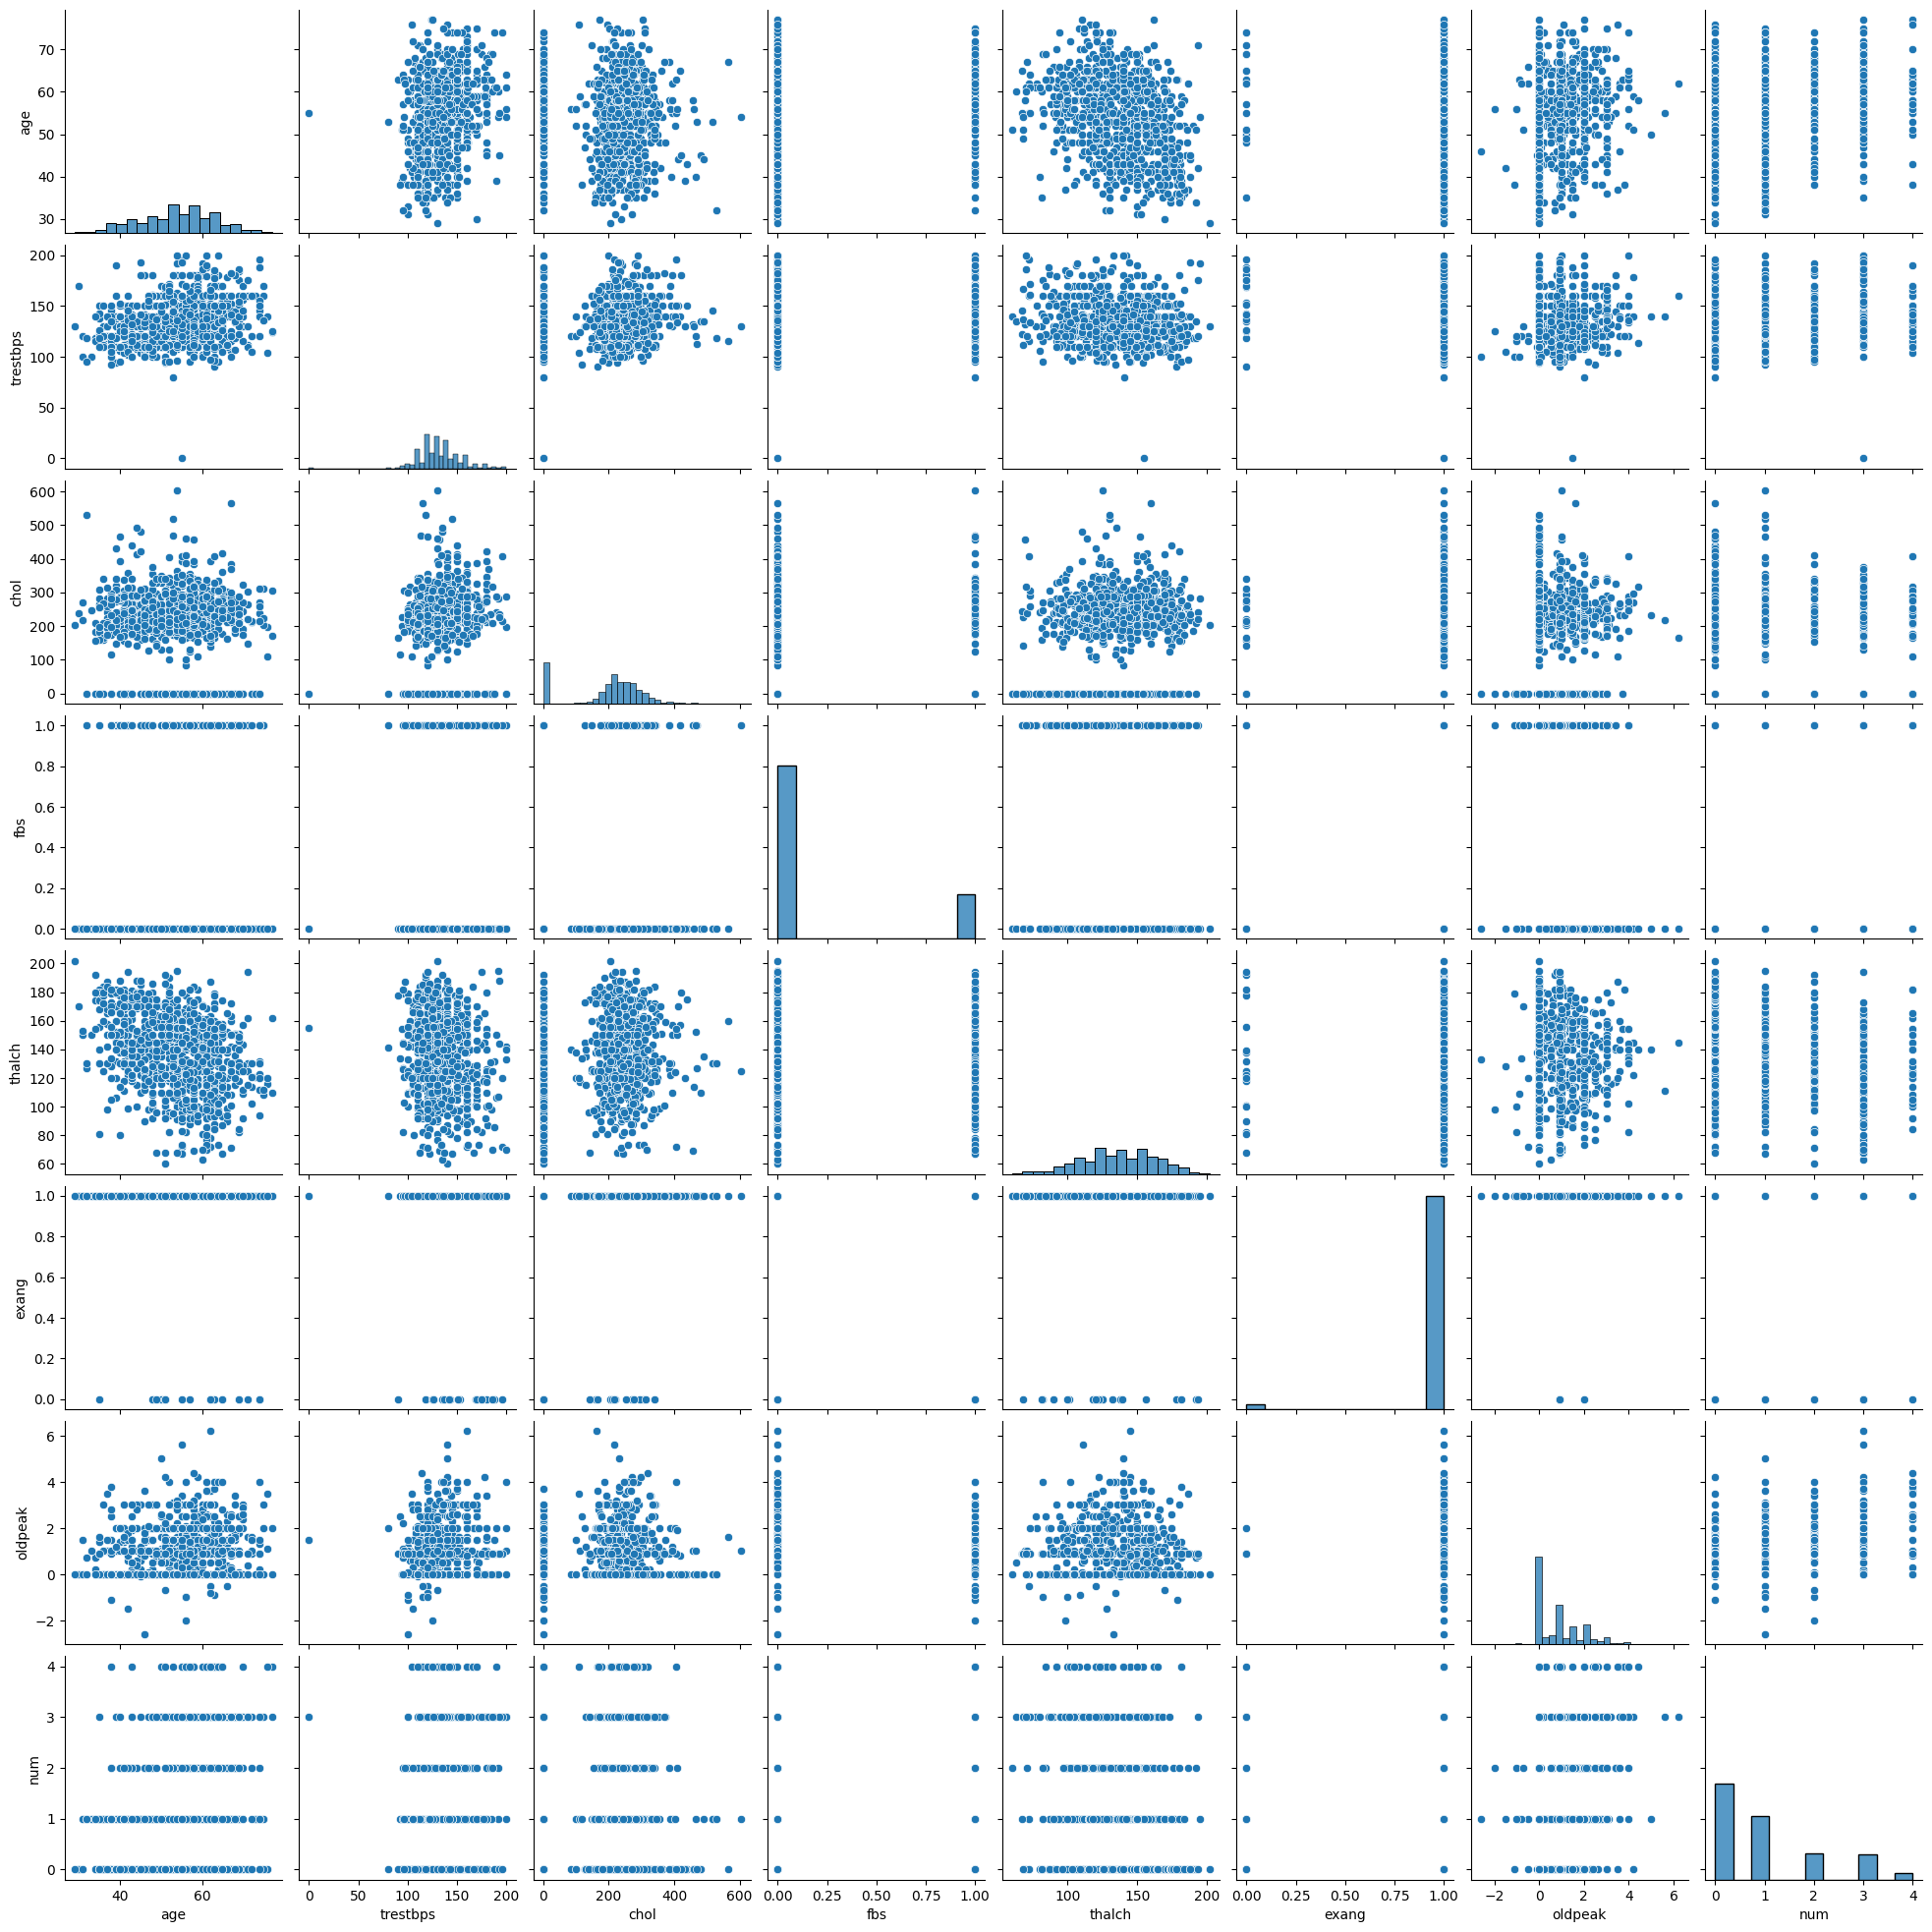

In [164]:
sns.pairplot(df)

#Feature Engineering

In [165]:
df

age   sex               cp  trestbps  chol    fbs           restecg  \
0     63  Male   typical angina       145   233   True    lv hypertrophy   
1     41  Male  atypical angina       135   203  False            normal   
2     57  Male     asymptomatic       140   192  False            normal   
3     52  Male   typical angina       118   186  False    lv hypertrophy   
4     57  Male     asymptomatic       110   201  False            normal   
..   ...   ...              ...       ...   ...    ...               ...   
903   53  Male     asymptomatic       125     0  False            normal   
904   62  Male     asymptomatic       166   170  False  st-t abnormality   
905   56  Male      non-anginal       170     0  False    lv hypertrophy   
906   56  Male      non-anginal       144   208   True  st-t abnormality   
907   57  Male     asymptomatic       142   277   True  st-t abnormality   

     thalch  exang   oldpeak        slope               thal  num  
0       150   True  2.300000  downsloping       fixed defect    0  
1       132   True  0.000000         flat       fixed defect    0  
2       148   True  0.400000         flat       fixed defect    0  
3       190   True  0.000000         flat       fixed defect    0  
4       126   True  1.500000         flat       fixed defect    0  
..      ...    ...       ...          ...                ...  ...  
903     120   True  1.500000    upsloping  reversable defect    4  
904     120   True  3.000000         flat  reversable defect    4  
905     123   True  2.500000  downsloping             normal    4  
906     105   True  0.891253  downsloping       fixed defect    4  
907     182  False  0.891253         flat  reversable defect    4  

[908 rows x 13 columns]

In [166]:
df.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         2
oldpeak      54
slope         3
thal          3
num           5
dtype: int64

In [167]:
#Apply one hot encoding
df_encoded = pd.get_dummies(df, columns=['sex', 'cp', 'restecg', 'slope', 'thal' ], drop_first=False)

In [168]:
df_encoded

age  trestbps  chol    fbs  thalch  exang   oldpeak  num  sex_Female  \
0     63       145   233   True     150   True  2.300000    0       False   
1     41       135   203  False     132   True  0.000000    0       False   
2     57       140   192  False     148   True  0.400000    0       False   
3     52       118   186  False     190   True  0.000000    0       False   
4     57       110   201  False     126   True  1.500000    0       False   
..   ...       ...   ...    ...     ...    ...       ...  ...         ...   
903   53       125     0  False     120   True  1.500000    4       False   
904   62       166   170  False     120   True  3.000000    4       False   
905   56       170     0  False     123   True  2.500000    4       False   
906   56       144   208   True     105   True  0.891253    4       False   
907   57       142   277   True     182  False  0.891253    4       False   

     sex_Male  ...  cp_typical angina  restecg_lv hypertrophy  restecg_normal  \
0        True  ...               True                    True           False   
1        True  ...              False                   False            True   
2        True  ...              False                   False            True   
3        True  ...               True                    True           False   
4        True  ...              False                   False            True   
..        ...  ...                ...                     ...             ...   
903      True  ...              False                   False            True   
904      True  ...              False                   False           False   
905      True  ...              False                    True           False   
906      True  ...              False                   False           False   
907      True  ...              False                   False           False   

     restecg_st-t abnormality  slope_downsloping  slope_flat  slope_upsloping  \
0                       False               True       False            False   
1                       False              False        True            False   
2                       False              False        True            False   
3                       False              False        True            False   
4                       False              False        True            False   
..                        ...                ...         ...              ...   
903                     False              False       False             True   
904                      True              False        True            False   
905                     False               True       False            False   
906                      True               True       False            False   
907                      True              False        True            False   

     thal_fixed defect  thal_normal  thal_reversable defect  
0                 True        False                   False  
1                 True        False                   False  
2                 True        False                   False  
3                 True        False                   False  
4                 True        False                   False  
..                 ...          ...                     ...  
903              False        False                    True  
904              False        False                    True  
905              False         True                   False  
906               True        False                   False  
907              False        False                    True  

[908 rows x 23 columns]

#Decision Tree Classification

In [169]:
df_encoded.shape

(908, 23)

In [170]:
x = df_encoded.drop('num', axis=1)
y=df_encoded['num']

In [171]:
x

age  trestbps  chol    fbs  thalch  exang   oldpeak  sex_Female  \
0     63       145   233   True     150   True  2.300000       False   
1     41       135   203  False     132   True  0.000000       False   
2     57       140   192  False     148   True  0.400000       False   
3     52       118   186  False     190   True  0.000000       False   
4     57       110   201  False     126   True  1.500000       False   
..   ...       ...   ...    ...     ...    ...       ...         ...   
903   53       125     0  False     120   True  1.500000       False   
904   62       166   170  False     120   True  3.000000       False   
905   56       170     0  False     123   True  2.500000       False   
906   56       144   208   True     105   True  0.891253       False   
907   57       142   277   True     182  False  0.891253       False   

     sex_Male  cp_asymptomatic  ...  cp_typical angina  \
0        True            False  ...               True   
1        True            False  ...              False   
2        True             True  ...              False   
3        True            False  ...               True   
4        True             True  ...              False   
..        ...              ...  ...                ...   
903      True             True  ...              False   
904      True             True  ...              False   
905      True            False  ...              False   
906      True            False  ...              False   
907      True             True  ...              False   

     restecg_lv hypertrophy  restecg_normal  restecg_st-t abnormality  \
0                      True           False                     False   
1                     False            True                     False   
2                     False            True                     False   
3                      True           False                     False   
4                     False            True                     False   
..                      ...             ...                       ...   
903                   False            True                     False   
904                   False           False                      True   
905                    True           False                     False   
906                   False           False                      True   
907                   False           False                      True   

     slope_downsloping  slope_flat  slope_upsloping  thal_fixed defect  \
0                 True       False            False               True   
1                False        True            False               True   
2                False        True            False               True   
3                False        True            False               True   
4                False        True            False               True   
..                 ...         ...              ...                ...   
903              False       False             True              False   
904              False        True            False              False   
905               True       False            False              False   
906               True       False            False               True   
907              False        True            False              False   

     thal_normal  thal_reversable defect  
0          False                   False  
1          False                   False  
2          False                   False  
3          False                   False  
4          False                   False  
..           ...                     ...  
903        False                    True  
904        False                    True  
905         True                   False  
906        False                   False  
907        False                    True  

[908 rows x 22 columns]

In [172]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [173]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

## Building Decision Tree Classifier using Entropy Criteria

In [174]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

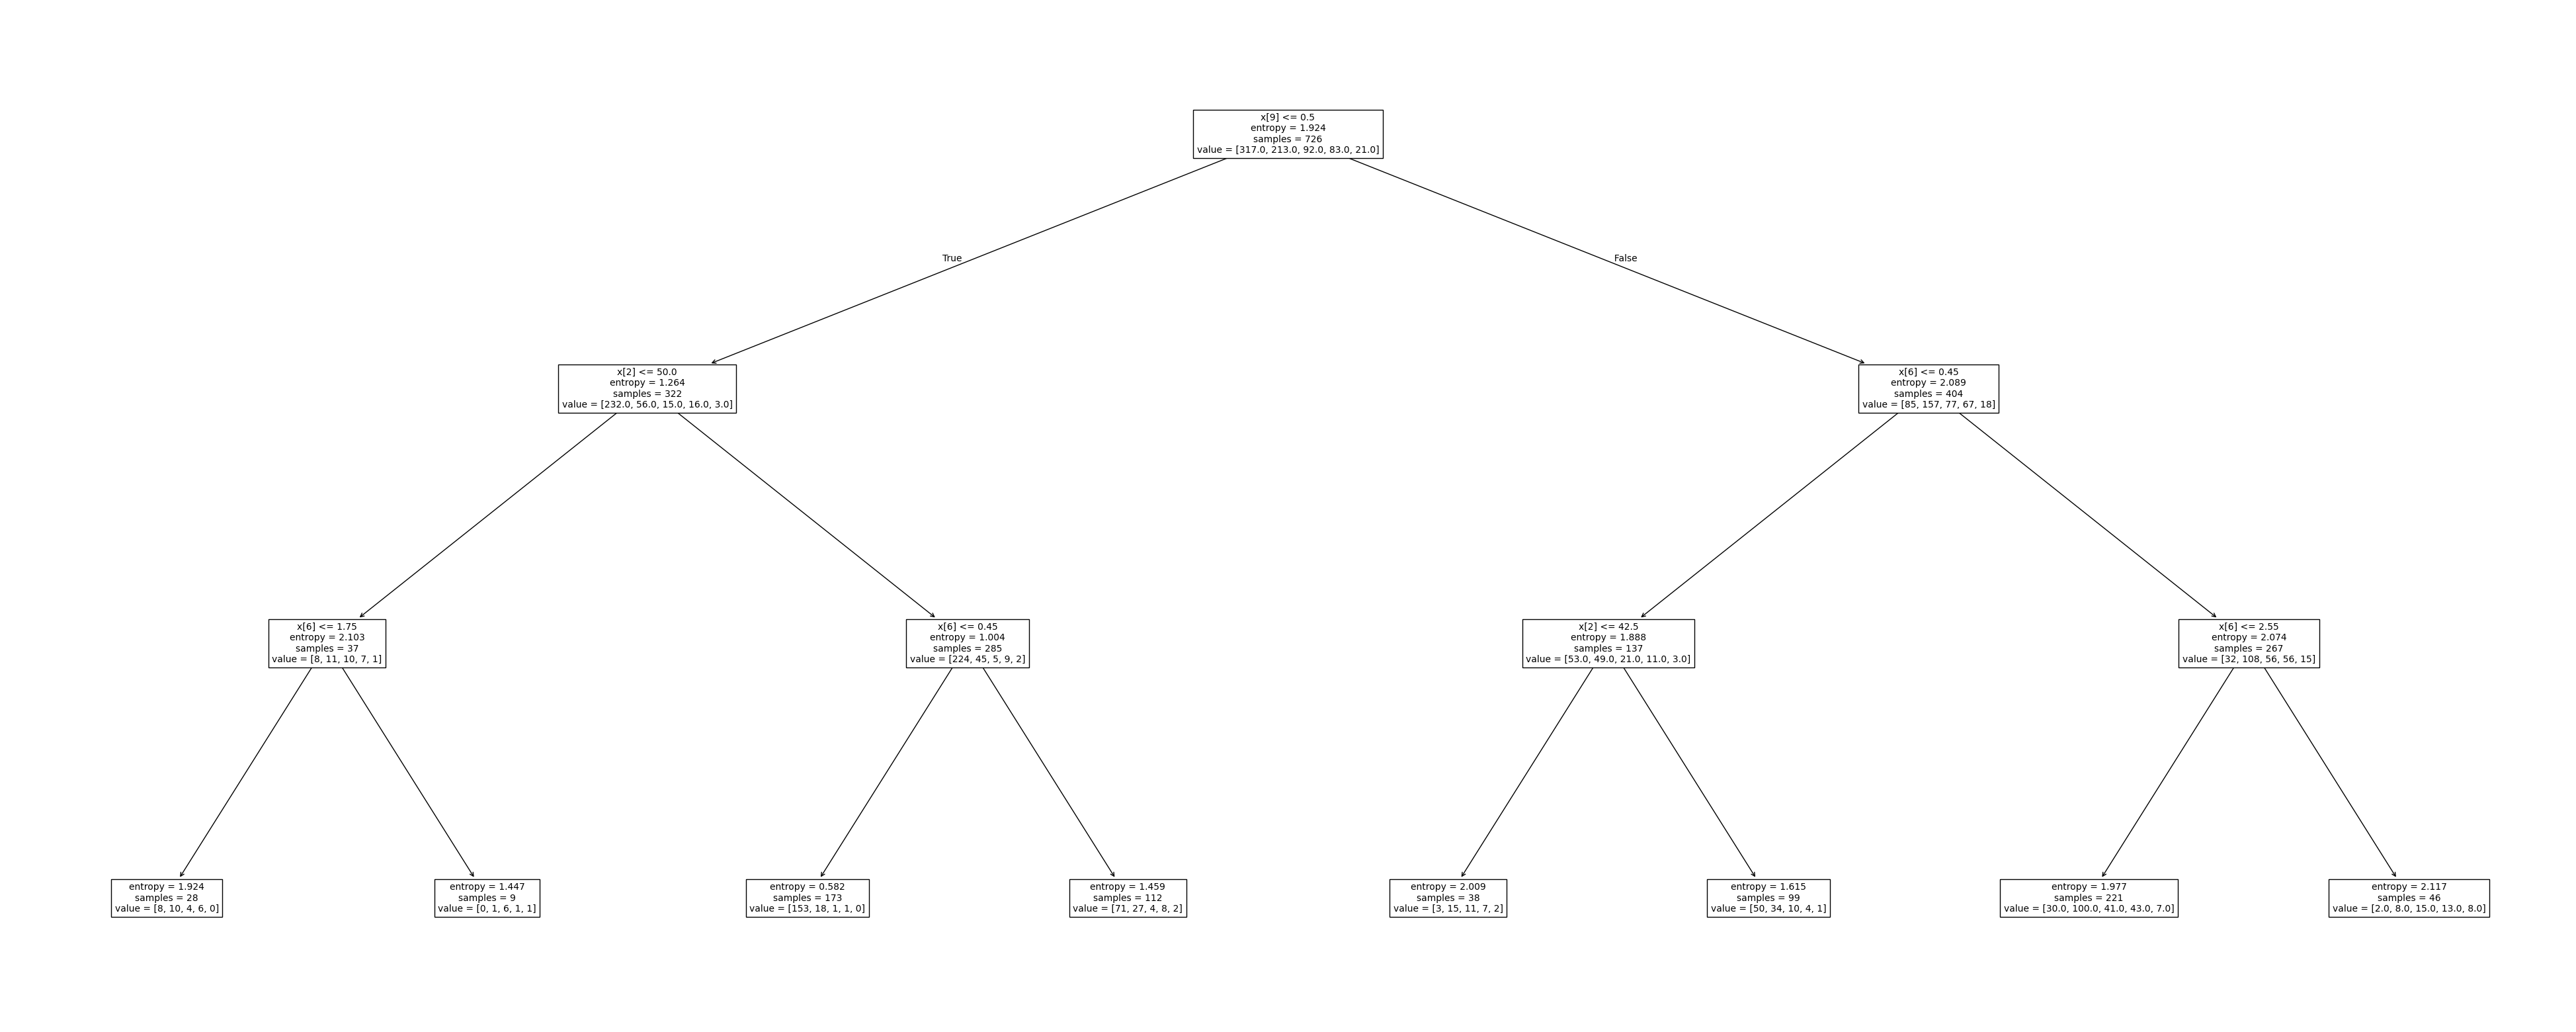

In [175]:
plt.figure(figsize=(50, 20))
tree.plot_tree(model, fontsize=10)
plt.show()

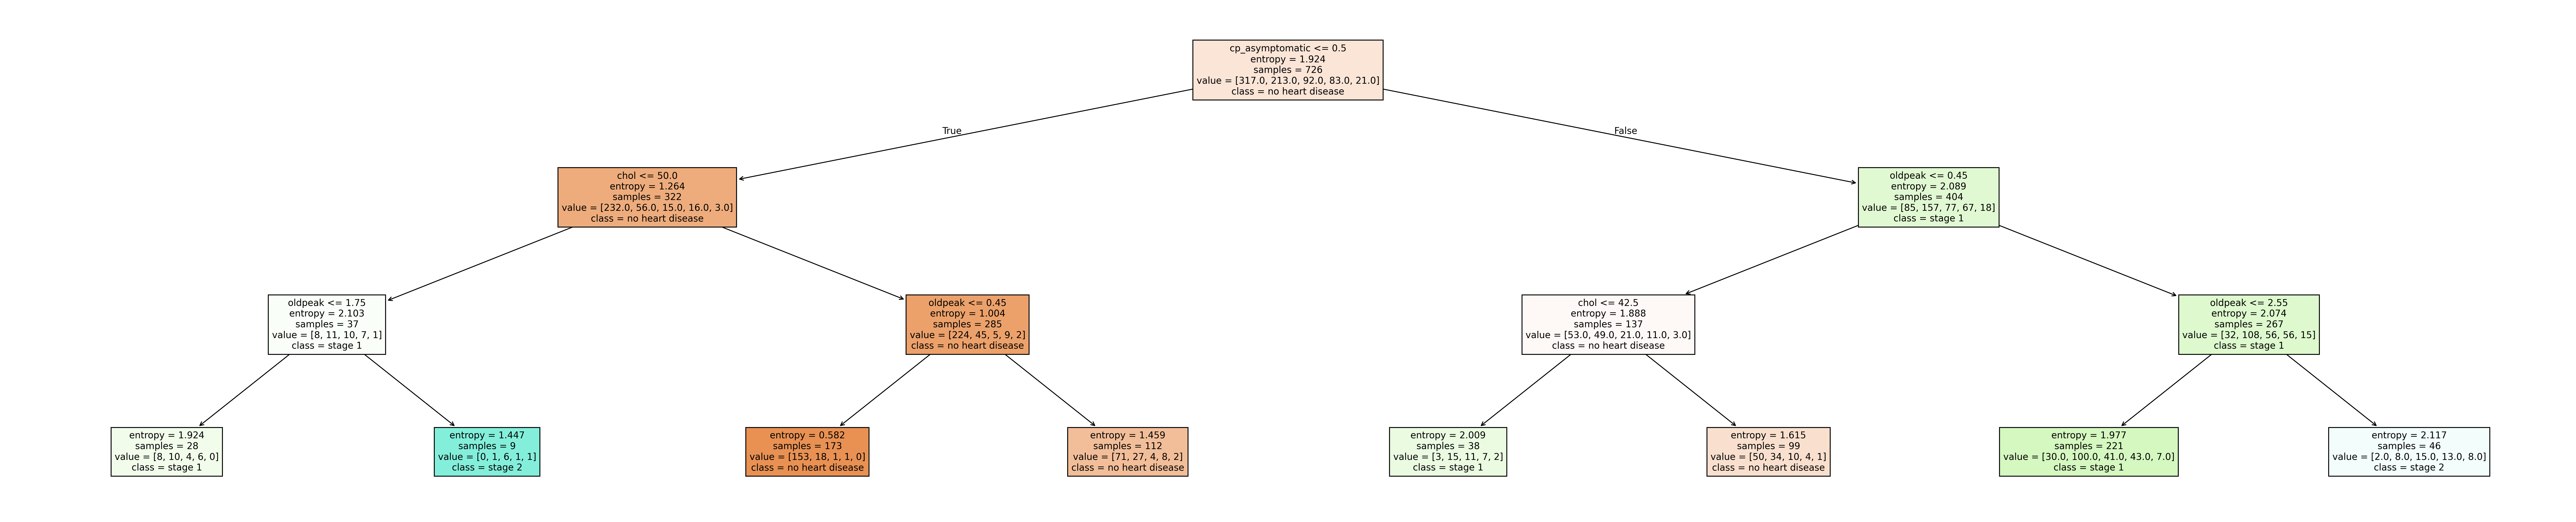

In [176]:
fn = df_encoded.columns.drop('num').tolist()
cn = ['no heart disease', 'stage 1', 'stage 2', 'stage 3', 'stage 4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,10), dpi=300)
tree.plot_tree(model, fontsize=10,
               feature_names = fn,
               class_names=cn,
               filled = True);

In [177]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

0    97
1    73
2    12
Name: count, dtype: int64

In [178]:
preds

array([0, 1, 1, 1, 0, 1, 1, 1, 2, 0, 2, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0])

In [179]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0   0   1  2
num             
0      67  14  1
1      14  32  6
2       5  11  1
3       9  12  3
4       2   4  1

In [180]:
accuracy = accuracy_score(y_test,preds)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, preds, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

recall = recall_score(y_test, preds, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, preds, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.5494505494505495
Precision: 0.44423276083705404
Recall: 0.5494505494505495
F1-score: 0.49001037721669577


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [181]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for each class
y_prob = model.predict_proba(x_test)

# Calculate ROC-AUC for each pair of classes and average
roc_auc_ovo = roc_auc_score(y_test_bin, y_prob, average='macro', multi_class='ovo')
print(f"ROC-AUC (OvO): {roc_auc_ovo}")

ROC-AUC (OvO): 0.697801536963096


#Hyperparameter tuning

In [182]:
model1 = DecisionTreeClassifier(criterion='entropy',  # Use entropy instead of Gini
                                   splitter='best',  # Consider all features for splits
                                   max_depth=5,  # Allow for deeper trees
                                   min_samples_split=2,  # Small minimum samples for splits
                                   min_samples_leaf=1)  # Small minimum samples for leaves
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [183]:
#Predicting on test data
preds1 = model1.predict(x_test) # predicting on test data set
pd.Series(preds1).value_counts() # getting the count of each category

0    90
1    54
3    22
2    16
Name: count, dtype: int64

In [184]:
preds1

array([0, 1, 2, 1, 0, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 2, 0,
       1, 0, 3, 0, 0, 0, 1, 0, 3, 1, 0, 1, 1, 3, 0, 1, 0, 0, 0, 3, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       3, 2, 1, 0, 1, 0, 3, 3, 1, 0, 0, 1, 3, 3, 1, 1, 1, 1, 2, 1, 3, 1,
       0, 0, 0, 0, 0, 0, 2, 1, 3, 1, 1, 2, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0,
       1, 2, 0, 3, 1, 1, 1, 0, 2, 0, 0, 1, 3, 1, 2, 0, 0, 0, 1, 0, 0, 1,
       0, 2, 1, 1, 3, 0, 0, 0, 1, 1, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 1, 3,
       2, 0, 3, 2, 1, 0])

In [185]:
pd.crosstab(y_test,preds1)

col_0   0   1  2  3
num                
0      65   9  2  6
1      11  28  9  4
2       5   7  2  3
3       8   7  2  7
4       1   3  1  2

#Evaluation Metrics

In [186]:
accuracy = accuracy_score(y_test,preds1)
print(f"Accuracy: {accuracy}")

precision = precision_score(y_test, preds1, average='weighted')  # Use 'weighted' for multi-class
print(f"Precision: {precision}")

recall = recall_score(y_test, preds1, average='weighted')
print(f"Recall: {recall}")

f1 = f1_score(y_test, preds1, average='weighted')
print(f"F1-score: {f1}")

Accuracy: 0.5604395604395604
Precision: 0.5271788396788397
Recall: 0.5604395604395604
F1-score: 0.5429307482744344


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [187]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the target labels
y_test_bin1 = label_binarize(y_test, classes=np.unique(y_test))

# Get predicted probabilities for each class
y_prob1 = model1.predict_proba(x_test)

# Calculate ROC-AUC for each pair of classes and average
roc_auc_ovo1 = roc_auc_score(y_test_bin1, y_prob1, average='macro', multi_class='ovo')
print(f"ROC-AUC (OvO): {roc_auc_ovo}")

ROC-AUC (OvO): 0.697801536963096


Observations:

Depth 5: Only predicts 0,1,2,3 cases but the evaluation metrics are higher

Depth 6: Predicts 0,1,2,3, and 4 (all cases) but evaluation metrics are worse

Depth 7: Model began to overfit and quality of prediction reduced

The accuracy and recall are around 55%, suggesting a reasonable ability to correctly classify instances and identify true positives. The precision of 52.59% indicates that the model has a moderate ability to avoid false positive predictions. The F1-score of 0.5395 reflects a balance between precision and recall, suggesting that the model is not overly biased towards either metric. The ROC-AUC (OvO) of 0.6978 suggests a moderate ability to discriminate between different classes, better than random guessing but with room for improvement.

#Visualization

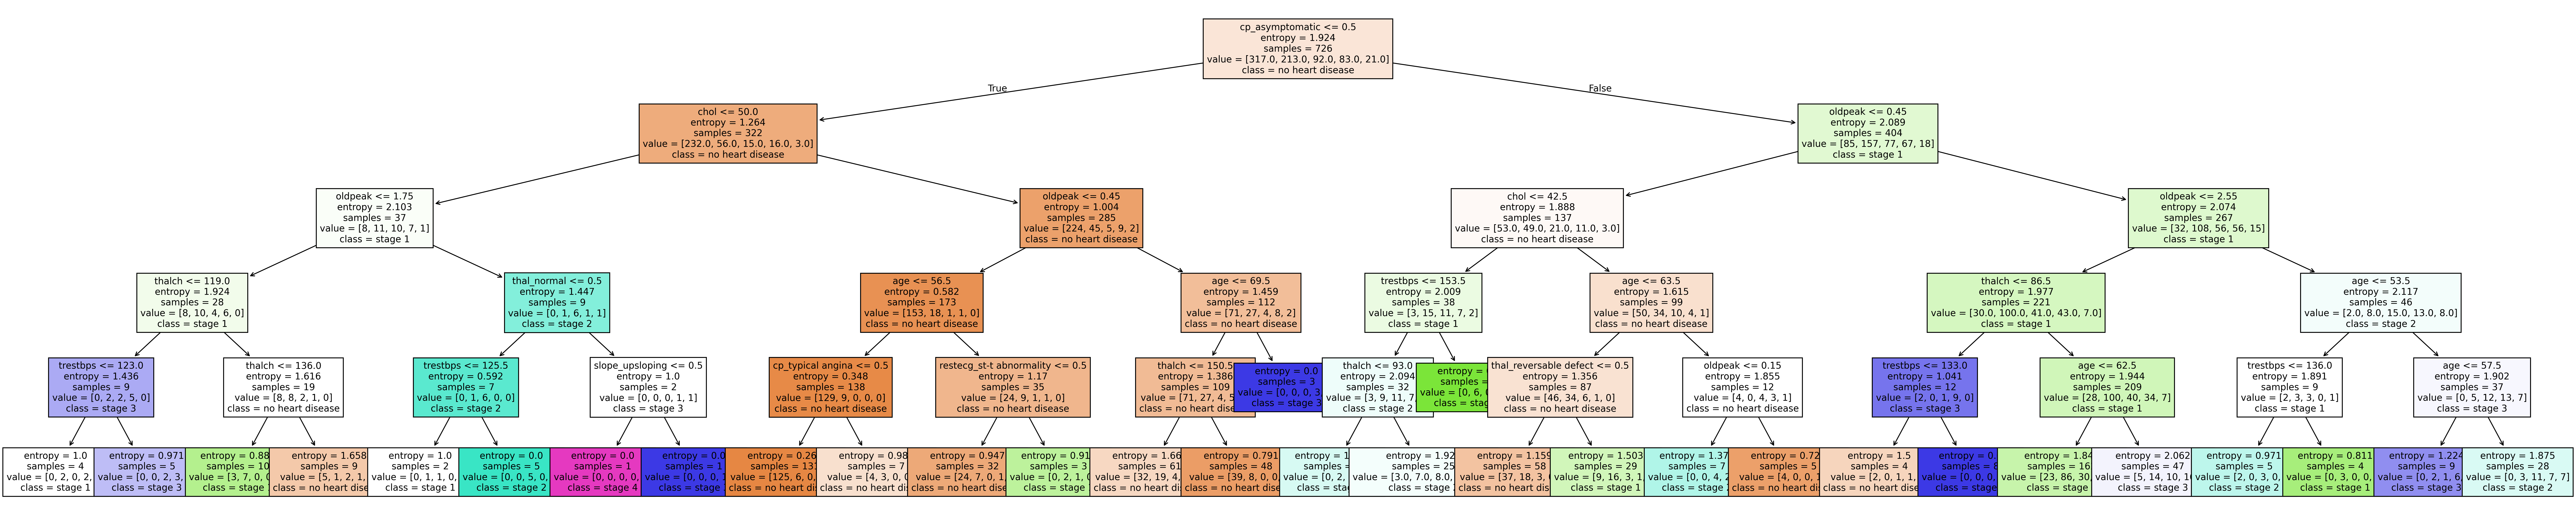

In [188]:
#Visualize tree structure
fn = df_encoded.columns.drop('num').tolist()
cn = ['no heart disease', 'stage 1', 'stage 2', 'stage 3', 'stage 4']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (50,10), dpi=300)
tree.plot_tree(model1, fontsize=10,
               feature_names = fn,
               class_names=cn,
               filled = True);


In [189]:
from sklearn.tree import export_text

# Assuming 'model' is your trained decision tree classifier
tree_rules = export_text(model, feature_names=fn)  # fn is your list of feature names
print(tree_rules)

|--- cp_asymptomatic <= 0.50
|   |--- chol <= 50.00
|   |   |--- oldpeak <= 1.75
|   |   |   |--- class: 1
|   |   |--- oldpeak >  1.75
|   |   |   |--- class: 2
|   |--- chol >  50.00
|   |   |--- oldpeak <= 0.45
|   |   |   |--- class: 0
|   |   |--- oldpeak >  0.45
|   |   |   |--- class: 0
|--- cp_asymptomatic >  0.50
|   |--- oldpeak <= 0.45
|   |   |--- chol <= 42.50
|   |   |   |--- class: 1
|   |   |--- chol >  42.50
|   |   |   |--- class: 0
|   |--- oldpeak >  0.45
|   |   |--- oldpeak <= 2.55
|   |   |   |--- class: 1
|   |   |--- oldpeak >  2.55
|   |   |   |--- class: 2



#Analysis

Important features are cp, chol, and oldpeak.

Node 1 divides based on cp at value of 0.50. Further divsion by chol at 50 followed by oldpeak at 1.75 or at 0.45 in one branch. In another branch, oldpeak of 0.45 followed by chol at 42.50 or oldpeak again at 2.55



> What are some common hyperparameters of decision tree models, and how do they affect the model's performace?

Decision tree models have several hyperparameters that significantly influence their performance. max_depth controls the maximum depth of the tree, preventing overfitting by limiting its complexity but potentially leading to underfitting if set too low. min_samples_split and min_samples_leaf determine the minimum number of samples required to split an internal node or be at a leaf node, respectively, also affecting the tree's complexity and potential for overfitting or underfitting. max_features limits the number of features considered when searching for the best split, potentially improving generalization but reducing performance if too restrictive. Finally, criterion defines the function used to evaluate the quality of a split, with different criteria like 'gini' or 'entropy' potentially leading to slightly different tree structures.


> What is the difference between the Label encoding and one-hot encoding?

Label encoding and one-hot encoding are two common techniques for handling categorical data in machine learning. Label encoding assigns a unique integer to each category in a feature, introducing an ordinal relationship that may not be appropriate for all features as it implies an order or hierarchy among the categories. In contrast, one-hot encoding creates a new binary feature for each category, avoiding the imposition of an ordinal relationship. However, one-hot encoding can increase the dimensionality of the data, potentially leading to computational challenges. The choice between these encoding techniques depends on the specific dataset and the nature of the categorical features.




